In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import time
import requests

In [10]:
benign=pd.read_csv('./data/IoT_data/1.benign.csv')
g_c=pd.read_csv('./data/IoT_data/1.gafgyt.combo.csv')
g_j=pd.read_csv('./data/IoT_data/1.gafgyt.junk.csv')
g_s=pd.read_csv('./data/IoT_data/1.gafgyt.scan.csv')
g_t=pd.read_csv('./data/IoT_data/1.gafgyt.tcp.csv')
g_u=pd.read_csv('./data/IoT_data/1.gafgyt.udp.csv')
m_a=pd.read_csv('./data/IoT_data/1.mirai.ack.csv')
m_sc=pd.read_csv('./data/IoT_data/1.mirai.scan.csv')
m_sy=pd.read_csv('./data/IoT_data/1.mirai.syn.csv')
m_u=pd.read_csv('./data/IoT_data/1.mirai.udp.csv')
m_u_p=pd.read_csv('./data/IoT_data/1.mirai.udpplain.csv')

# benign=benign.sample(frac=0.25,replace=False)
g_c=g_c.sample(frac=0.15,replace=False)
g_j=g_j.sample(frac=0.25,replace=False)
g_s=g_s.sample(frac=0.25,replace=False)
g_t=g_t.sample(frac=0.15,replace=False)
g_u=g_u.sample(frac=0.15,replace=False)
m_a=m_a.sample(frac=0.25,replace=False)
m_sc=m_sc.sample(frac=0.15,replace=False)
m_sy=m_sy.sample(frac=0.25,replace=False)
m_u=m_u.sample(frac=0.1,replace=False)
m_u_p=m_u_p.sample(frac=0.17,replace=False)

benign['type']='benign'
m_u['type']='attack'
g_c['type']='attack'
g_j['type']='attack'
g_s['type']='attack'
g_t['type']='attack'
g_u['type']='attack'
m_a['type']='attack'
m_sc['type']='attack'
m_sy['type']='attack'
m_u_p['type']='attack'

data=pd.concat([benign,m_u,g_c,g_j,g_s,g_t,g_u,m_a,m_sc,m_sy,m_u_p],
               axis=0, sort=False, ignore_index=True)

In [11]:
data.groupby('type')['type'].count()

type
attack    163437
benign     49548
Name: type, dtype: int64

In [19]:
sampler=np.random.permutation(len(data))
data=data.take(sampler)
data.head()

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,type
34410,3.938099,102.000000,0.000000,3.962704,102.000000,0.000000,3.987516,102.000000,2.940000e-07,4.680089,...,2.290000e-29,0.0,4.219621,102.0,0.000002,144.249783,6.560000e-12,-5.920000e-30,-1.330000e-18,benign
169770,153.372741,69.116663,44.519740,253.232903,68.948663,45.202712,711.581802,69.185237,4.422488e+01,6657.146199,...,0.000000e+00,0.0,1.000000,74.0,0.000000,74.000000,0.000000e+00,0.000000e+00,0.000000e+00,attack
23875,1.000000,98.000000,0.000000,1.000000,98.000000,0.000000,1.000002,98.000005,6.590000e-05,2.539936,...,-4.470000e-49,0.0,5.309084,98.0,0.000002,138.592929,5.140000e-12,-1.870000e-29,-5.150000e-18,benign
53977,99.802609,498.520696,24328.822892,176.825060,469.785534,34509.869954,591.804318,415.083610,4.932692e+04,5666.181099,...,0.000000e+00,0.0,1.000000,60.0,0.000000,60.000000,0.000000e+00,0.000000e+00,0.000000e+00,attack
173054,124.765751,73.987813,0.170473,206.436362,73.968727,0.436846,633.473174,73.441572,7.507266e+00,6776.170385,...,0.000000e+00,0.0,1.000000,74.0,0.000000,74.000000,0.000000e+00,0.000000e+00,0.000000e+00,attack


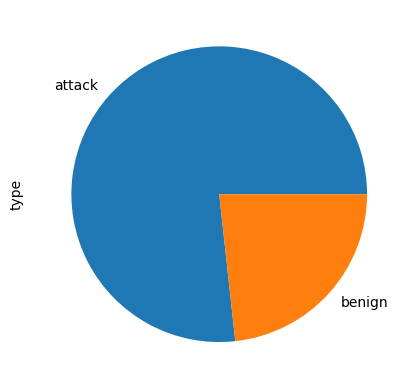

In [14]:
def pie_graph(feature):
    data[feature].value_counts().plot(kind="pie")
pie_graph('type')

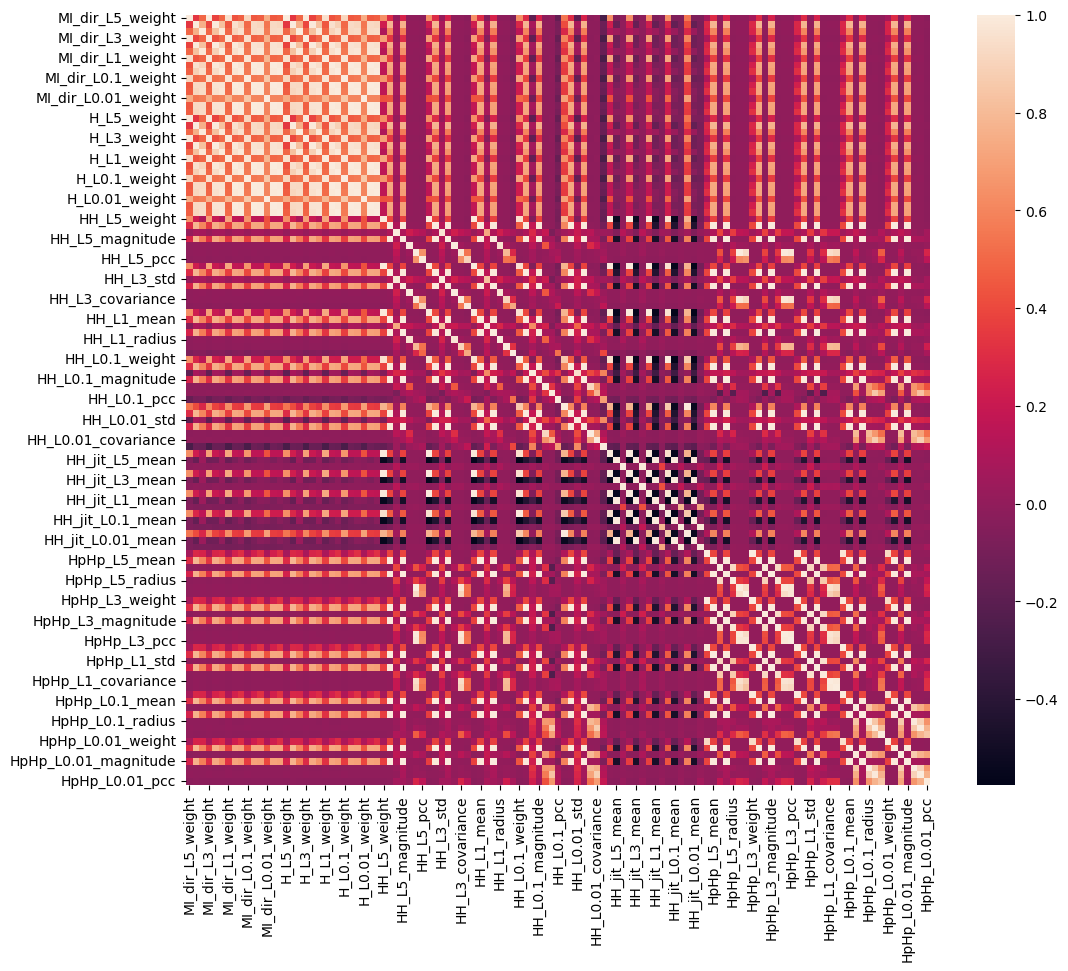

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc
0,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.000000,0.0,0.0,1.000000,60.000000,0.000000,60.000000,0.000000,0.0,0.0
1,1.000000,354.000000,0.000000,1.000000,354.000000,0.000000,1.000000,354.000000,0.000000,1.000000,...,34.095047,0.0,0.0,5.319895,344.262695,4.710446,344.262695,22.188299,0.0,0.0
2,1.857879,360.458980,35.789338,1.912127,360.275733,35.923972,1.969807,360.091968,35.991542,1.996939,...,100.081513,0.0,0.0,6.318264,347.703087,9.034660,347.703087,81.625077,0.0,0.0
3,1.000000,337.000000,0.000000,1.000000,337.000000,0.000000,1.000000,337.000000,0.000000,1.000000,...,0.000000,0.0,0.0,1.000000,337.000000,0.000000,337.000000,0.000000,0.0,0.0
4,1.680223,172.140917,18487.448750,1.793580,182.560279,18928.175300,1.925828,193.165753,19153.795810,1.992323,...,0.000000,0.0,0.0,1.000000,60.000000,0.000000,60.000000,0.000000,0.0,0.0


In [17]:
data = data.dropna(axis=1)# drop columns with NaN

#df = df[[col for col in df if df[col].nunique() > 1]]# keep columns where there are more than 1 unique values

#df_filt = df.loc[:, df.nunique() > 1]

#corr = df_filt.corr()

data = data[[col for col in data if data[col].nunique() > 1]]# keep columns where there are more than 1 unique values
numeric_cols = data.select_dtypes(include=[np.number]).columns
data_numeric = data[numeric_cols]

corr = data_numeric.corr()

plt.figure(figsize=(12,10))

sns.heatmap(corr)

plt.show()

data_numeric.head()